# Data Collection and PreProcessing

## Data Source

In [5]:
import os
import yfinance as yf
import pandas as pd  # Ensure pandas is imported for MultiIndex handling

# Define stock tickers and date range
start_date = "2014-08-01"
end_date = "2016-11-30"
tickers = ['IBM', 'AAPL', 'META', 'GOOGL']

# Create a folder named 'datasets' if it doesn't exist
output_folder = "datasets"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Download data for each stock and save with standardized column names
for ticker in tickers:
    # Download the stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Check if columns are a MultiIndex and flatten if necessary
    if isinstance(stock_data.columns, pd.MultiIndex):
        stock_data.columns = ['_'.join(col).strip().lower() for col in stock_data.columns]
    else:
        stock_data.columns = [col.replace(' ', '_').lower() for col in stock_data.columns]
    
    # Print the first few rows of the data
    print(f"\nData for {ticker}:")
    print(stock_data.head())
    
    # Save to CSV in the 'datasets' folder
    file_path = os.path.join(output_folder, f'{ticker}_stock.csv')
    stock_data.to_csv(file_path, index=True)

    print(f"Saved {ticker} data to {file_path}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for IBM:
            adj close_ibm   close_ibm    high_ibm     low_ibm    open_ibm  \
Date                                                                        
2014-08-01     115.999741  180.831741  183.078400  180.554489  182.122375   
2014-08-04     116.300240  181.300186  181.596558  180.305923  181.022949   
2014-08-05     114.742538  178.871887  180.879547  178.240921  180.449326   
2014-08-06     114.724007  177.791580  178.661575  176.328873  177.208420   
2014-08-07     113.693794  176.195023  178.470367  175.506699  178.432129   

            volume_ibm  
Date                    
2014-08-01     5419431  
2014-08-04     2223691  
2014-08-05     3460063  
2014-08-06     4023962  
2014-08-07     2833196  
Saved IBM data to datasets/IBM_stock.csv

Data for AAPL:
            adj close_aapl  close_aapl  high_aapl   low_aapl  open_aapl  \
Date                                                                      
2014-08-01       21.209681   24.032499  24.155001  23.702499  2

## Data Cleaning

In [6]:
import pandas as pd
import numpy as np
import os

def clean_data(df):
    """
    Clean the stock data by:
    1. Handling missing values.
    2. Detecting and treating outliers using the IQR method.
    3. Applying log transformation to ensure stationarity for close prices.
    """
    # Handle missing values by forward-fill, backward-fill, or dropping
    if df.isnull().values.any():
        print("Missing values found. Filling missing values...")
        df.fillna(method='ffill', inplace=True)  # Forward fill
        df.fillna(method='bfill', inplace=True)  # Backward fill
    
    # Detect and handle outliers (e.g., using the IQR method)
    for column in ['open', 'high', 'low', 'close', 'adj_close']:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with the nearest bound
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    # Apply log transformation to the 'close' prices for stationarity
    if 'close' in df.columns:
        df['log_close'] = np.log(df['close'] + 1)  # Add 1 to avoid log(0)
    
    return df

# Load, clean and save the cleaned data
output_folder = "datasets"
tickers = ['IBM', 'AAPL', 'META', 'GOOGL']

for ticker in tickers:
    # Load the raw data
    file_path = os.path.join(output_folder, f'{ticker}_stock.csv')
    stock_data = pd.read_csv(file_path, index_col=0, parse_dates=True)
    
    # Clean the data
    print(f"\nCleaning data for {ticker}...")
    cleaned_data = clean_data(stock_data)
    
    # Print the first few rows of the cleaned data
    print(f"Cleaned data for {ticker}:")
    print(cleaned_data.head())
    
    # Save the cleaned data to CSV
    cleaned_file_path = os.path.join(output_folder, f'{ticker}_stock_cleaned.csv')
    cleaned_data.to_csv(cleaned_file_path, index=True)
    print(f"Saved cleaned data for {ticker} to {cleaned_file_path}")



Cleaning data for IBM...
Cleaned data for IBM:
            adj close_ibm   close_ibm    high_ibm     low_ibm    open_ibm  \
Date                                                                        
2014-08-01     115.999741  180.831741  183.078400  180.554489  182.122375   
2014-08-04     116.300240  181.300186  181.596558  180.305923  181.022949   
2014-08-05     114.742538  178.871887  180.879547  178.240921  180.449326   
2014-08-06     114.724007  177.791580  178.661575  176.328873  177.208420   
2014-08-07     113.693794  176.195023  178.470367  175.506699  178.432129   

            volume_ibm  
Date                    
2014-08-01     5419431  
2014-08-04     2223691  
2014-08-05     3460063  
2014-08-06     4023962  
2014-08-07     2833196  
Saved cleaned data for IBM to datasets/IBM_stock_cleaned.csv

Cleaning data for AAPL...
Cleaned data for AAPL:
            adj close_aapl  close_aapl  high_aapl   low_aapl  open_aapl  \
Date                                               

In [13]:
import numpy as np
import pandas as pd
import os

# Define the folder where the cleaned data is stored
output_folder = "datasets"
tickers = ['IBM', 'AAPL', 'META', 'GOOGL']

# Create the log_close_ column for each ticker
for ticker in tickers:
    # Load the cleaned data for each ticker
    file_path = os.path.join(output_folder, f'{ticker}_stock_cleaned.csv')
    stock_data = pd.read_csv(file_path, index_col=0, parse_dates=True)
    
    # Check if 'close' column exists before creating 'log_close'
    close_col = f'close_{ticker.lower()}'
    log_close_col = f'log_close_{ticker.lower()}'
    
    if close_col in stock_data.columns:
        # Create the 'log_close' column by taking the log of 'close'
        stock_data[log_close_col] = np.log(stock_data[close_col])
        print(f"Created '{log_close_col}' column for {ticker}.")
        
        # Save the updated data with the new 'log_close' column
        updated_file_path = os.path.join(output_folder, f'{ticker}_stock_with_log.csv')
        stock_data.to_csv(updated_file_path, index=True)
        print(f"Saved updated data for {ticker} with 'log_close' column to {updated_file_path}")
    else:
        print(f"'{close_col}' column not found for {ticker}. Please check column names.")


Created 'log_close_ibm' column for IBM.
Saved updated data for IBM with 'log_close' column to datasets/IBM_stock_with_log.csv
Created 'log_close_aapl' column for AAPL.
Saved updated data for AAPL with 'log_close' column to datasets/AAPL_stock_with_log.csv
Created 'log_close_meta' column for META.
Saved updated data for META with 'log_close' column to datasets/META_stock_with_log.csv
Created 'log_close_googl' column for GOOGL.
Saved updated data for GOOGL with 'log_close' column to datasets/GOOGL_stock_with_log.csv


## Stationarity Check - Augmented Dickey-Fuller (ADF) Test

In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import os

# Define function to perform ADF test
def adf_test(series):
    result = adfuller(series.dropna())
    return result[0], result[1]

# Define folder where the updated data is stored
output_folder = "datasets"
tickers = ['IBM', 'AAPL', 'META', 'GOOGL']

# Function to check stationarity for both 'close' and 'log_close'
def check_stationarity():
    for ticker in tickers:
        # Load the updated data with the 'log_close' column
        file_path = os.path.join(output_folder, f'{ticker}_stock_with_log.csv')
        stock_data = pd.read_csv(file_path, index_col=0, parse_dates=True)
        
        # Define column names
        close_col = f'close_{ticker.lower()}'
        log_close_col = f'log_close_{ticker.lower()}'
        
        # Perform ADF test on the 'close' column
        if close_col in stock_data.columns:
            print(f"\nPerforming stationarity check for {ticker} - {close_col}...")
            adf_stat, p_value = adf_test(stock_data[close_col])
            print(f"ADF test for '{close_col}' - ADF Statistic: {adf_stat}, p-value: {p_value}")
            
            if p_value > 0.05:
                print(f"The '{close_col}' series is nonstationary. Applying differencing.")
                stock_data[close_col] = stock_data[close_col].diff().dropna()  # First differencing
            else:
                print(f"The '{close_col}' series is stationary.")

        # Perform ADF test on the 'log_close' column
        if log_close_col in stock_data.columns:
            print(f"\nPerforming stationarity check for {ticker} - {log_close_col}...")
            adf_stat, p_value = adf_test(stock_data[log_close_col])
            print(f"ADF test for '{log_close_col}' - ADF Statistic: {adf_stat}, p-value: {p_value}")
            
            if p_value > 0.05:
                print(f"The '{log_close_col}' series is nonstationary. Applying differencing.")
                stock_data[log_close_col] = stock_data[log_close_col].diff().dropna()  # First differencing
            else:
                print(f"The '{log_close_col}' series is stationary.")
        
        # Save the stationary data to a new file
        updated_file_path = os.path.join(output_folder, f'{ticker}_stock_stationary.csv')
        stock_data.to_csv(updated_file_path, index=True)
        print(f"Saved stationary data for {ticker} to {updated_file_path}")

# Call the function to check stationarity for all tickers
check_stationarity()



Performing stationarity check for IBM - close_ibm...
ADF test for 'close_ibm' - ADF Statistic: -2.266411002310209, p-value: 0.18302997624844458
The 'close_ibm' series is nonstationary. Applying differencing.

Performing stationarity check for IBM - log_close_ibm...
ADF test for 'log_close_ibm' - ADF Statistic: -2.1926190510998502, p-value: 0.20893521381882862
The 'log_close_ibm' series is nonstationary. Applying differencing.
Saved stationary data for IBM to datasets/IBM_stock_stationary.csv

Performing stationarity check for AAPL - close_aapl...
ADF test for 'close_aapl' - ADF Statistic: -2.1682503299850526, p-value: 0.2179698405819862
The 'close_aapl' series is nonstationary. Applying differencing.

Performing stationarity check for AAPL - log_close_aapl...
ADF test for 'log_close_aapl' - ADF Statistic: -2.205287322269062, p-value: 0.2043320637396588
The 'log_close_aapl' series is nonstationary. Applying differencing.
Saved stationary data for AAPL to datasets/AAPL_stock_stationary.

# Building ARIMA model fro short-term dependencies

## Arima Model Setup
- Use the ACF (Auto-Correlation Function) and PACF (Partial Auto-Correlation Function) plots to identify potential values for the AR (Auto-Regressive) and MA (Moving Average) parameters.
- Build and train the ARIMA model on the preprocessed series.


Plotting ACF and PACF for IBM...


TypeError: Axes.stem() got an unexpected keyword argument 'use_line_collection'

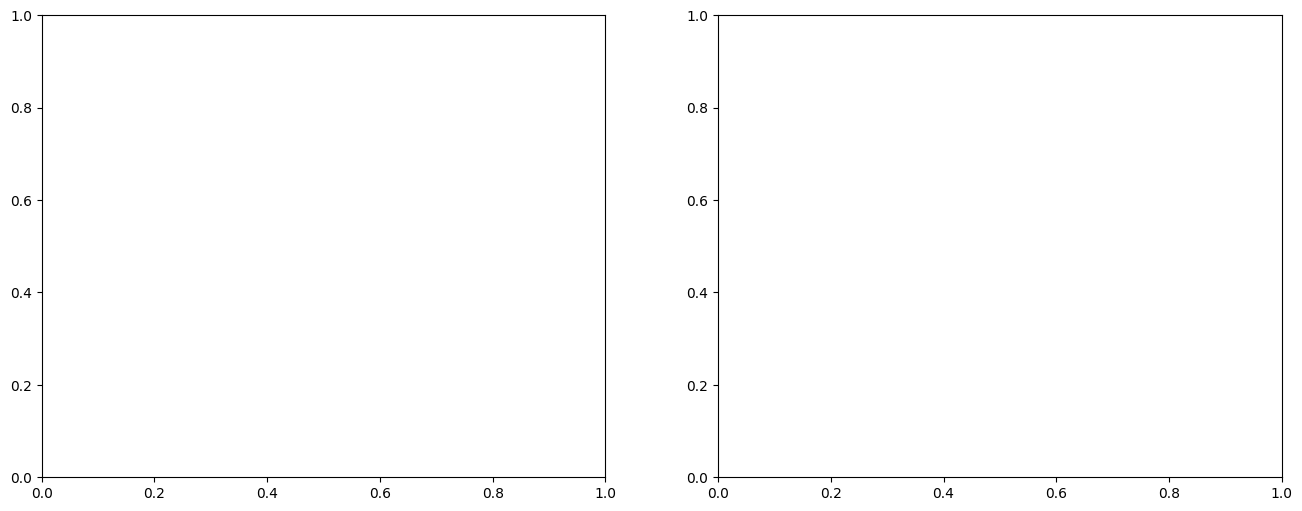

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import os

# Define the folder where the stationary data is stored
output_folder = "datasets"
tickers = ['IBM', 'AAPL', 'META', 'GOOGL']

# Load the stationary data and plot ACF/PACF
def plot_acf_pacf(ticker, column_name):
    file_path = os.path.join(output_folder, f'{ticker}_stock_stationary.csv')
    stock_data = pd.read_csv(file_path, index_col=0, parse_dates=True)
    
    # Drop any NaN values from the column
    stock_data[column_name] = stock_data[column_name].dropna()
    
    # Plot ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    acf_vals = acf(stock_data[column_name], nlags=40)
    pacf_vals = pacf(stock_data[column_name], nlags=40)
    
    # ACF plot
    axes[0].stem(range(len(acf_vals)), acf_vals, use_line_collection=True)
    axes[0].set_title(f"ACF for {ticker} - {column_name}")
    axes[0].set_xlabel('Lag')
    axes[0].set_ylabel('ACF')
    
    # PACF plot
    axes[1].stem(range(len(pacf_vals)), pacf_vals, use_line_collection=True)
    axes[1].set_title(f"PACF for {ticker} - {column_name}")
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('PACF')

    plt.tight_layout()
    plt.show()

# Function to train ARIMA model
def train_arima_model(ticker, column_name, p, d, q):
    file_path = os.path.join(output_folder, f'{ticker}_stock_stationary.csv')
    stock_data = pd.read_csv(file_path, index_col=0, parse_dates=True)
    
    # Drop any NaN values from the column
    stock_data[column_name] = stock_data[column_name].dropna()
    
    # Build ARIMA model
    model = ARIMA(stock_data[column_name], order=(p, d, q))
    model_fit = model.fit()

    # Print the model summary
    print(f"\nARIMA Model Summary for {ticker} - {column_name}:")
    print(model_fit.summary())

    return model_fit

# Loop through tickers and apply the steps
for ticker in tickers:
    column_name = f'log_close_{ticker.lower()}'  # Using the 'log_close' column for ARIMA
    
    # Plot ACF and PACF to identify parameters
    print(f"\nPlotting ACF and PACF for {ticker}...")
    plot_acf_pacf(ticker, column_name)
    
    # Based on the ACF and PACF plots, set p, d, q (you might need to adjust these values based on your observations)
    p, d, q = 1, 1, 1  # Example parameters, these should be adjusted based on the ACF/PACF plots
    
    # Train ARIMA model
    print(f"\nTraining ARIMA model for {ticker} - {column_name}...")
    arima_model = train_arima_model(ticker, column_name, p, d, q)

